In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv("C:/Users/Liu/Desktop/QM-Groupwork/AoLR Data collection 2017.csv")
df = df[['Borough name','Ward name','Density','65+ age','Smokers','Student','HR buildings','Over crowding','1 pump fires','2+ pump fires']]
df['Total fires'] = df['1 pump fires'] + df['2+ pump fires']

## Summary statistics of key fields

In [3]:
df.describe()

,Density,65+ age,Smokers,Student,HR buildings,Over crowding,1 pump fires,2+ pump fires,Total fires
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,8705.662400,1662.104000,1701.537600,2380.880000,11.220800,110.729600,16.960000,14.798400,31.758400
std,5192.097174,535.785973,619.225917,731.320828,28.135476,92.162163,12.621207,8.719875,19.458804
min,191.000000,590.000000,504.000000,750.000000,0.000000,5.000000,2.000000,2.000000,4.000000
25%,4848.000000,1284.000000,1251.000000,1900.000000,1.000000,40.000000,9.000000,9.000000,19.000000
50%,7446.000000,1571.000000,1622.000000,2250.000000,3.000000,84.000000,15.000000,13.000000,29.000000
75%,11794.000000,1884.000000,2049.000000,2850.000000,10.000000,159.000000,21.000000,19.000000,39.000000
max,28915.000000,3750.000000,5639.000000,4950.000000,340.000000,622.000000,151.000000,82.000000,230.000000


In [6]:
kurtosis_values = df.iloc[:, 2:].kurtosis()
skewness_values = df.iloc[:, 2:].skew()

print("Kurtosis:") # 峰度
print(kurtosis_values)

print("\nSkewness:") # 偏度
print(skewness_values)

Kurtosis:
Density           0.122389
65+ age           0.883402
Smokers           3.374744
Student           0.294245
HR buildings     62.418285
Over crowding     3.350130
1 pump fires     40.902031
2+ pump fires    14.082232
Total fires      33.780449
dtype: float64

Skewness:
Density          0.825557
65+ age          0.981566
Smokers          1.108079
Student          0.534868
HR buildings     6.841638
Over crowding    1.562339
1 pump fires     4.633060
2+ pump fires    2.593189
Total fires      4.129248
dtype: float64


## Distribution of key fields

In [8]:
selected_column = 'Total fires'

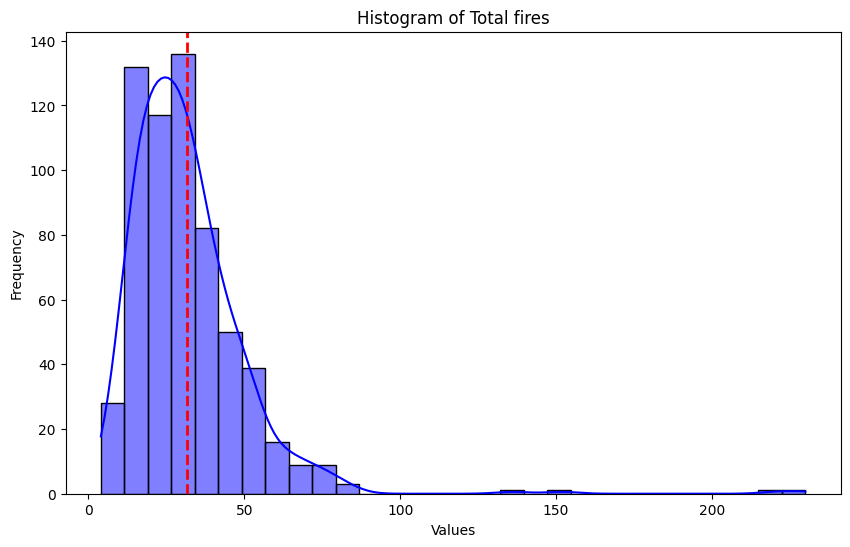

In [81]:
# single

plt.figure(figsize=(10, 6))
sns.histplot(df[selected_column], bins=30, kde=True, color='blue', edgecolor='black')
plt.axvline(df[selected_column].mean(), color='red', linestyle='dashed', linewidth=2)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of {selected_column}')

plt.show()

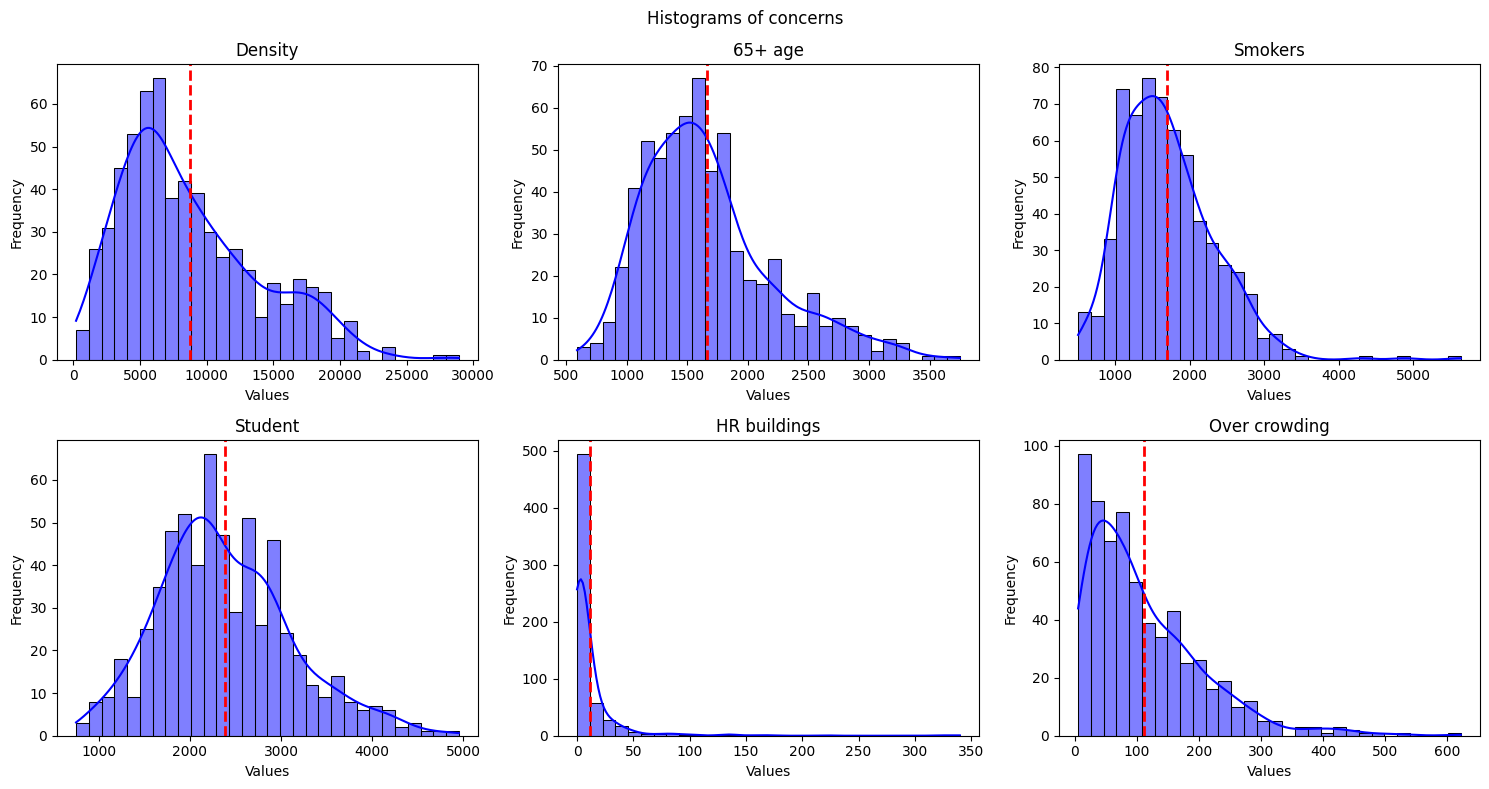

In [96]:
# multiple

df_data = df.iloc[:, 2:8]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=False)

for i, (col, ax) in enumerate(zip(df_data.columns, axes.flatten())):
    sns.histplot(df_data[col], bins=30, kde=True, ax=ax, color='blue', edgecolor='black')
    ax.axvline(df_data[col].mean(), color='red', linestyle='dashed', linewidth=2)
    ax.set_title(f'{col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.suptitle('Histograms of concerns')

plt.tight_layout()

## Q-Q plot

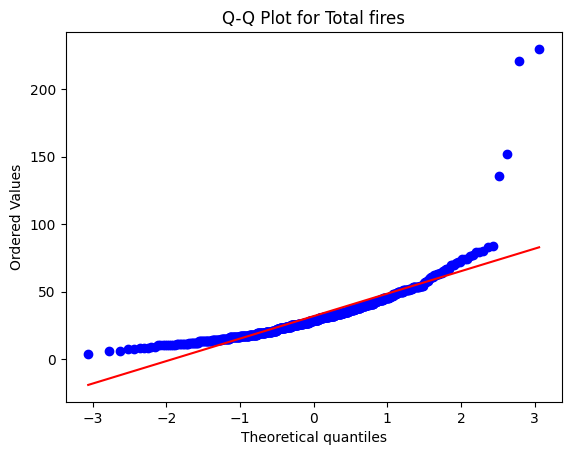

In [64]:
# single

stats.probplot(df[selected_column], dist="norm", plot=plt)
plt.title(f'Q-Q Plot of {selected_column}')
plt.show()

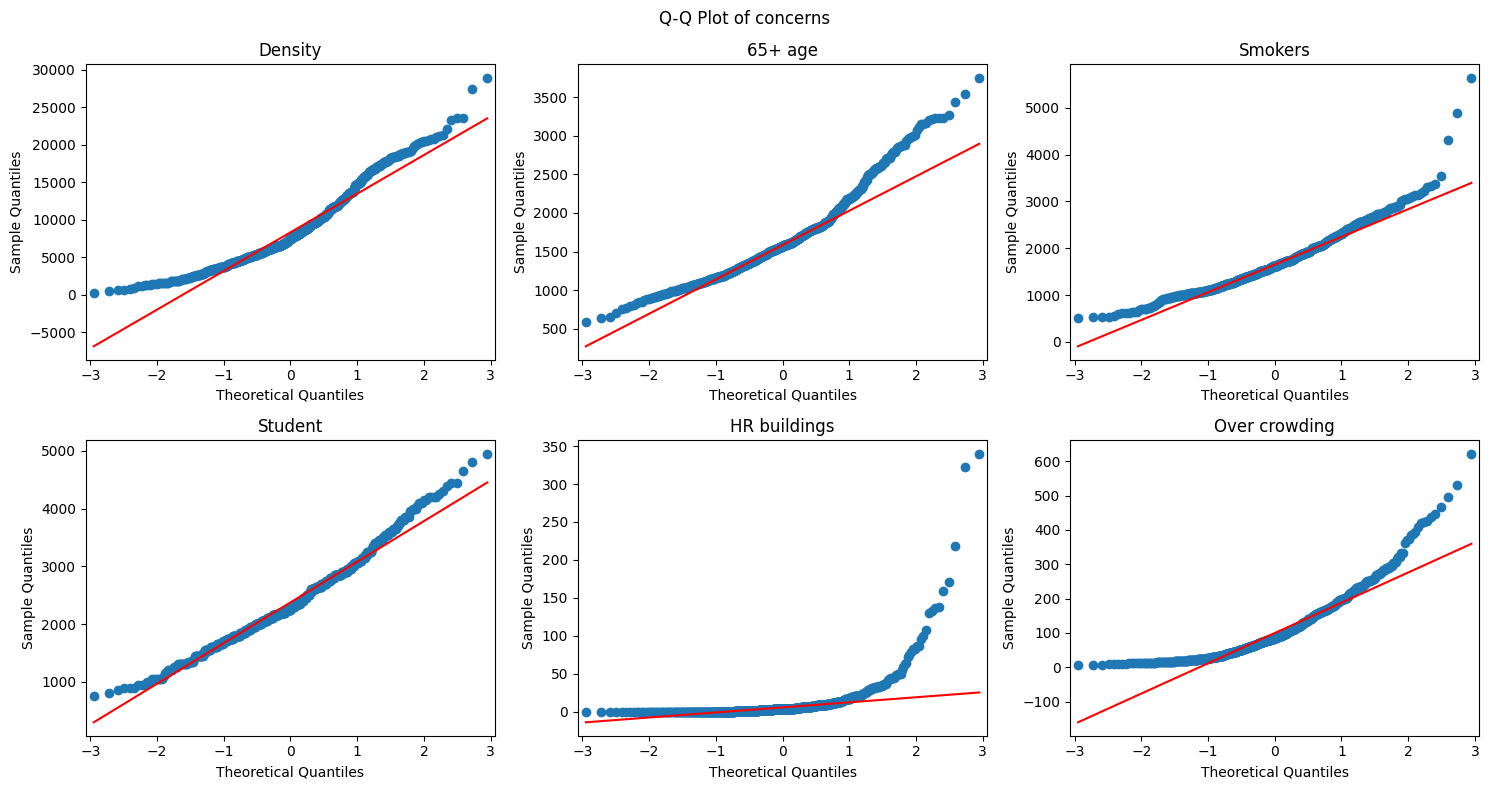

In [99]:
# multiple

df_data = df.iloc[:, 2:8]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=False)

for i, (col, ax) in enumerate(zip(df_data.columns, axes.flatten())):
    qqplot(df_data[col], line='q', ax=ax)
    ax.set_title(f'{col}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

plt.suptitle('Q-Q Plot of concerns')

plt.tight_layout()

## KS Test

In [116]:
results = []

for column in df_data.columns:
    stat, p_value = stats.kstest(df_data[column], 'norm')
    results.append([column, round(stat,3), round(p_value,3)])

results_df = pd.DataFrame(results, columns=['Variable', 'Statistical Value', 'P-Value'])

results_df

,Variable,Statistical Value,P-Value
0,Density,1.000,0.0
1,65+ age,1.000,0.0
2,Smokers,1.000,0.0
3,Student,1.000,0.0
4,HR buildings,0.619,0.0
5,Over crowding,1.000,0.0


## log-normal distribution？

In [119]:
df_log = np.log(df.iloc[:, 2:])
df_log.replace(-np.inf, np.nan, inplace=True)
df_log.head(10)

C:\Users\Liu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Density,65+ age,Smokers,Student,HR buildings,Over crowding,1 pump fires,2+ pump fires,Total fires
0,9.369990,6.556778,7.600402,7.901007,2.564949,5.533389,3.806662,3.091042,4.204693
1,9.017362,6.935370,7.311886,7.882315,NaN,4.304065,2.564949,2.484907,3.218876
2,9.365976,7.103322,7.541152,8.055158,1.945910,4.584967,2.639057,2.639057,3.332205
3,8.086410,7.349874,7.259116,7.740664,0.693147,3.663562,2.708050,2.484907,3.295837
4,8.071531,7.321189,7.340836,7.673223,0.693147,3.555348,3.044522,2.708050,3.583519
5,9.053219,7.047517,7.436617,7.863267,1.386294,4.718499,3.295837,2.564949,3.688879
6,9.458840,6.633318,7.390799,8.229511,2.772589,5.164786,3.496508,2.890372,3.931826
7,9.184304,7.162397,7.395722,8.022897,NaN,4.343805,3.135494,2.197225,3.465736
8,8.694670,7.259116,7.331060,7.901007,1.609438,4.219508,2.833213,2.397895,3.332205
9,8.915432,7.227662,7.421178,7.783224,0.000000,4.812184,2.639057,1.945910,3.044522


In [78]:
log_selected_column = 'Total fires'

<function matplotlib.pyplot.show(close=None, block=None)>

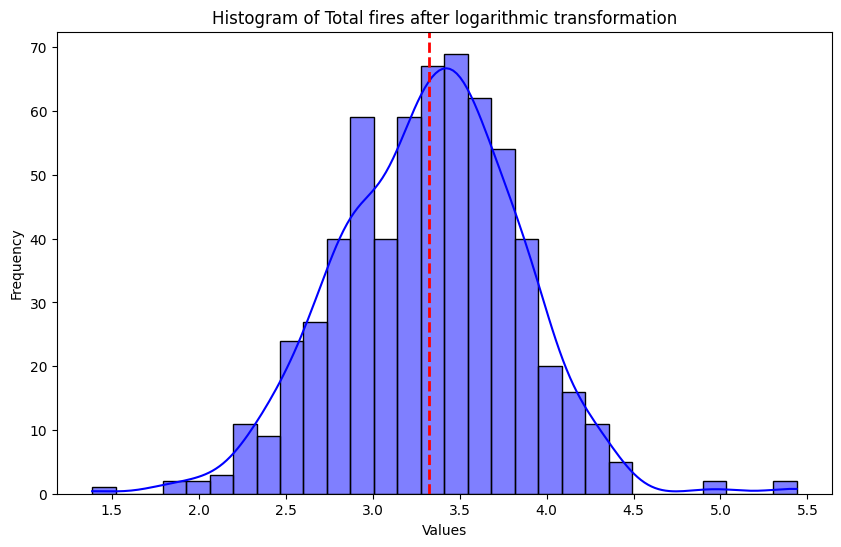

In [120]:
# single

plt.figure(figsize=(10, 6))
sns.histplot(df_log[log_selected_column], bins=30, kde=True, color='blue', edgecolor='black')
plt.axvline(df_log[log_selected_column].mean(), color='red', linestyle='dashed', linewidth=2)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of {log_selected_column} after logarithmic transformation')

plt.show

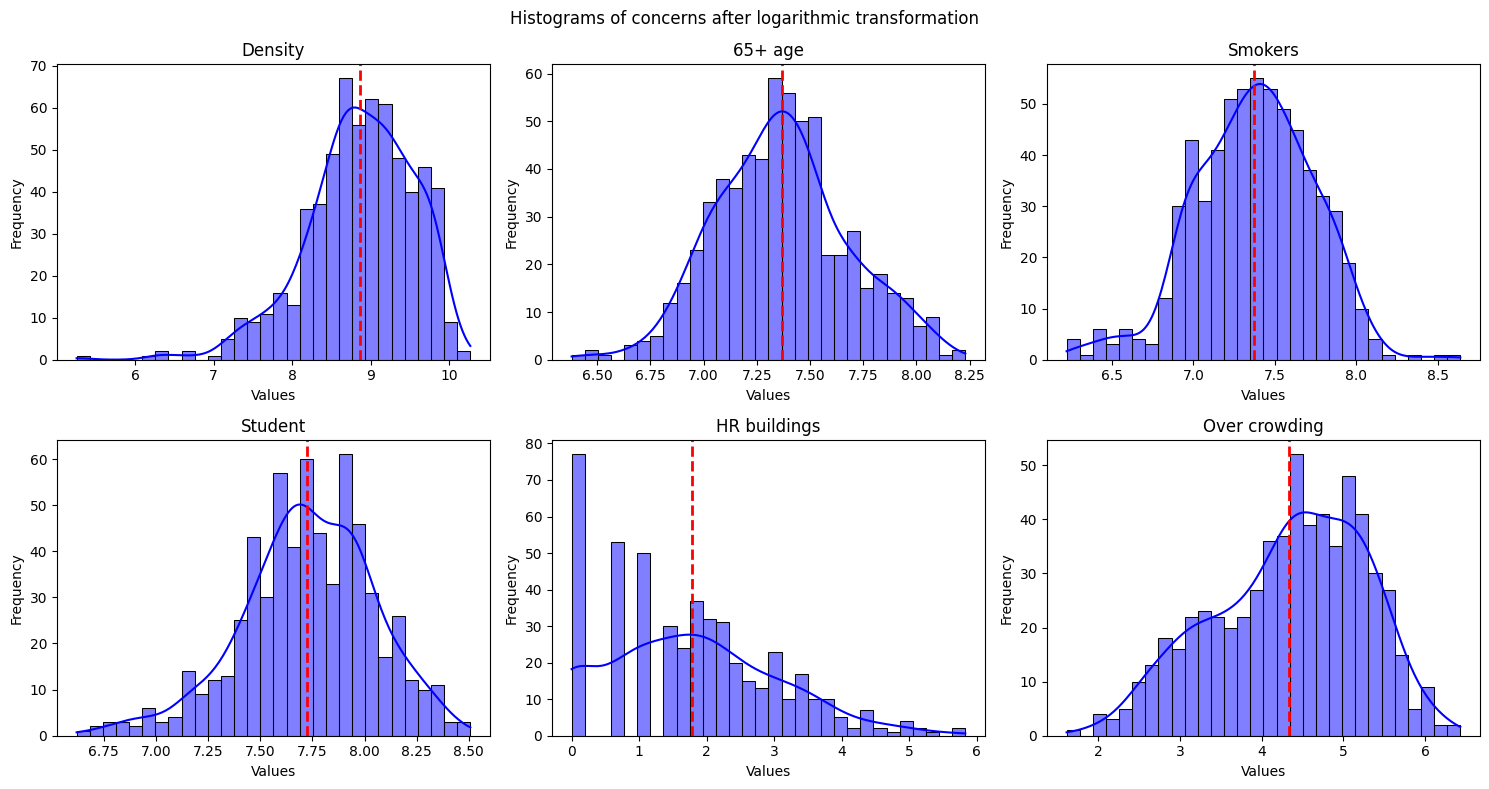

In [121]:
# multiple

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=False)

for i, (col, ax) in enumerate(zip(df_log.columns, axes.flatten())):
    sns.histplot(df_log[col], bins=30, kde=True, ax=ax, color='blue', edgecolor='black')
    ax.axvline(df_log[col].mean(), color='red', linestyle='dashed', linewidth=2)
    ax.set_title(f'{col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.suptitle('Histograms of concerns after logarithmic transformation')

plt.tight_layout()

## Q-Q plot after logarithmic transformation

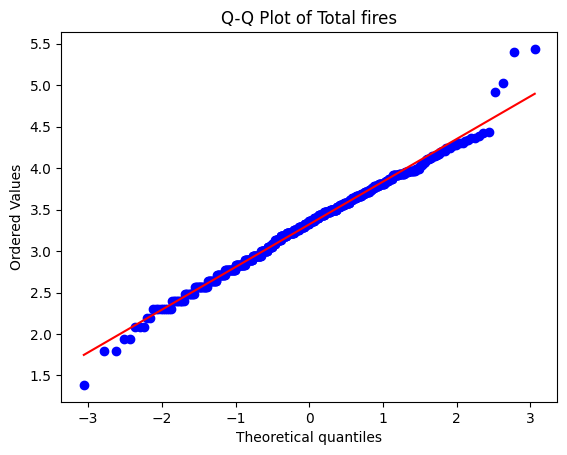

In [122]:
# single

stats.probplot(df_log[log_selected_column], dist="norm", plot=plt)
plt.title(f'Q-Q Plot of {log_selected_column}')
plt.show()

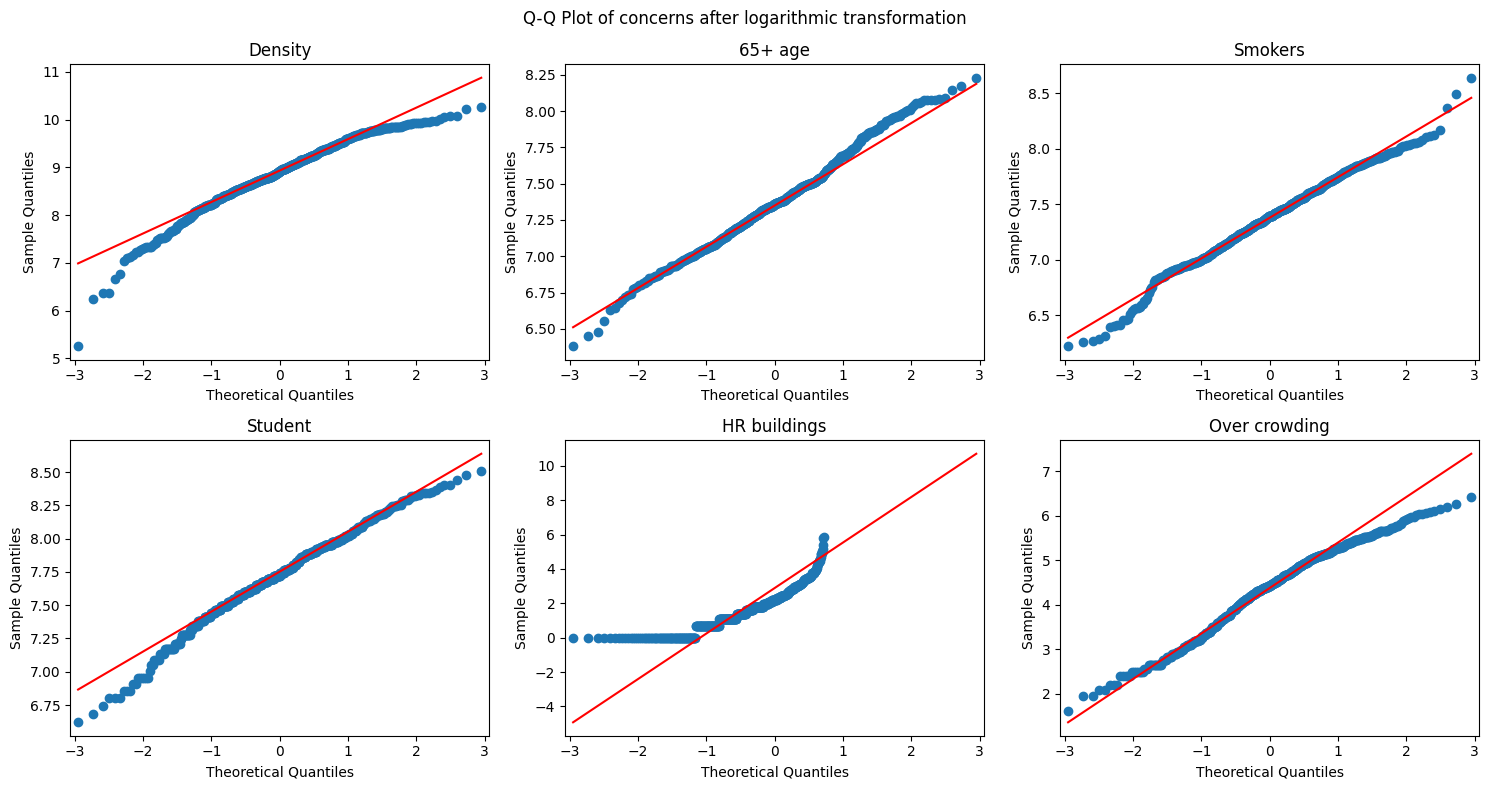

In [123]:
# multiple

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=False)

for i, (col, ax) in enumerate(zip(df_log.columns, axes.flatten())):
    qqplot(df_log[col], line='q', ax=ax)
    ax.set_title(f'{col}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

plt.suptitle('Q-Q Plot of concerns after logarithmic transformation')

plt.tight_layout()

## KS Test

In [124]:
log_results = []

for column in df_log.columns:
    stat, p_value = stats.kstest(df_log[column], 'norm')
    log_results.append([column, round(stat,3), round(p_value,3)])

log_results_df = pd.DataFrame(results, columns=['Variable', 'Statistical Value', 'P-Value'])

log_results_df

,Variable,Statistical Value,P-Value
0,Density,1.000,0.0
1,65+ age,1.000,0.0
2,Smokers,1.000,0.0
3,Student,1.000,0.0
4,HR buildings,0.619,0.0
5,Over crowding,1.000,0.0
